# Synthesising all the results

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from adjustText import adjust_text
from collections import OrderedDict

In [40]:
csv_dir = Path("./../output/bash/concatenated_reports/")
csv_files = [f for f in csv_dir.glob("*.csv") if f.name != "all_models.csv"]
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

df = df_concat.copy()
df.to_csv('./../output/bash/concatenated_reports/all_models.csv')

In [41]:
# remove outliers
df_filtered = df[df["normalized_error"] < 10]
df_filtered = df_filtered[df_filtered["country"] != "Unknown"]

In [42]:
df_filtered.keys()

Index(['Unnamed: 0', 'NUTS_NAME', 'LEVL_CODE', 'country', 'predicted',
       'logprobs', 'error', 'normalized_error', 'indicator', 'expe', 'model',
       'age_index_absolute_predicted', 'age_index_absolute_deviation',
       'age_index_absolute_logprobs', 'age_index_absolute_logprobs_deviation',
       'poverty_absolute_predicted', 'poverty_absolute_deviation',
       'poverty_absolute_logprobs', 'poverty_absolute_logprobs_deviation',
       'pop_density_absolute_predicted', 'pop_density_absolute_deviation',
       'pop_density_absolute_logprobs',
       'pop_density_absolute_logprobs_deviation', 'income_absolute_predicted',
       'income_absolute_deviation', 'income_absolute_logprobs',
       'income_absolute_logprobs_deviation', 'error_deviation',
       'logprobs_deviation'],
      dtype='object')

In [43]:
df_filtered

,Unnamed: 0,NUTS_NAME,LEVL_CODE,country,predicted,logprobs,error,normalized_error,indicator,expe,...,pop_density_absolute_predicted,pop_density_absolute_deviation,pop_density_absolute_logprobs,pop_density_absolute_logprobs_deviation,income_absolute_predicted,income_absolute_deviation,income_absolute_logprobs,income_absolute_logprobs_deviation,error_deviation,logprobs_deviation
0,0,Nordburgenland,3,Austria,6.0,-0.590775,5.0,0.142857,age_index,relative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Südburgenland,3,Austria,5.0,-0.615942,3.0,0.085714,age_index,relative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mittelburgenland,3,Austria,7.0,-0.445966,5.0,0.142857,age_index,relative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Weinviertel,3,Austria,9.0,-0.347870,8.0,0.228571,age_index,relative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Liezen,3,Austria,9.0,-0.501073,7.0,0.200000,age_index,relative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80966,10112,Ortadoğu Anadolu,1,Türkiye,10625.0,-0.185244,5925.0,1.260638,income,absolute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80968,10114,Slovenija,1,Slovenia,23810.0,-0.292342,3010.0,0.144712,income,absolute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80969,10115,Slovensko,1,Slovakia,20420.0,-0.267152,4820.0,0.308974,income,absolute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80972,10118,Batı Marmara,1,Türkiye,12200.0,-0.264254,2500.0,0.257732,income,absolute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd
import numpy as np

df_table = df_filtered.copy()

# df_table['category'] = df_table['indicator']
metrics = ['error', 'normalized_error', 'logprobs']

# Step 2: Build long-format summary
summary_rows = []

# Total row
for model in df_table['model'].unique():
    for metric in metrics:
        summary_rows.append({
            'indicator': 'Total',
            'metric': metric,
            'model': model,
            'value': df_table[df_table['model'] == model][metric].mean(),
            'deviation': df_table[df_table['model'] == model][metric].std()
        })

# Per category
for cat in df_table['indicator'].unique():
    for model in df_table['model'].unique():
        for metric in metrics:
            value = df_table[(df_table['model'] == model) & (df_table['indicator'] == cat)][metric].mean()
            summary_rows.append({
                'indicator': cat,
                'metric': metric,
                'model': model,
                'value': value,
                'deviation': df_table[df_table['model'] == model][metric].std()
            })

df_summary = pd.DataFrame(summary_rows)
df_summary


,indicator,metric,model,value,deviation
0,Total,error,Mistral-Small-24B-Instruct-2501,-542.109690,6281.036830
1,Total,normalized_error,Mistral-Small-24B-Instruct-2501,0.354615,0.477598
2,Total,logprobs,Mistral-Small-24B-Instruct-2501,-0.558759,0.273824
3,Total,error,Qwen2.5-32B-Instruct,45.812615,5989.441624
4,Total,normalized_error,Qwen2.5-32B-Instruct,0.430067,0.586325
...,...,...,...,...,...
115,income,normalized_error,Qwen2.5-7B-Instruct,0.396959,0.935593
116,income,logprobs,Qwen2.5-7B-Instruct,-0.071503,0.124344
117,income,error,Mistral-7B-Instruct-v0.3,3056.701910,6943.179660
118,income,normalized_error,Mistral-7B-Instruct-v0.3,0.387625,0.727518


In [7]:
# add $_$ value to print the latex table
def to_math_mode(val):
    if isinstance(val, str) and '_' in val:
        return f"{val.split('_')[0]} {val.split('_')[1]}"
    return val

def truncate_models(val):
    return val.split("-Instruct")[0]

df_summary["metric"] = df_summary["metric"].apply(to_math_mode)
df_summary["model"] = df_summary["model"].apply(to_math_mode)
df_summary["model"] = df_summary["model"].apply(truncate_models)
df_summary["indicator"] = df_summary["indicator"].apply(to_math_mode)
df_summary


,indicator,metric,model,value,deviation
0,Total,error,Mistral-Small-24B,-542.109690,6281.036830
1,Total,normalized error,Mistral-Small-24B,0.354615,0.477598
2,Total,logprobs,Mistral-Small-24B,-0.558759,0.273824
3,Total,error,Qwen2.5-32B,45.812615,5989.441624
4,Total,normalized error,Qwen2.5-32B,0.430067,0.586325
...,...,...,...,...,...
115,income,normalized error,Qwen2.5-7B,0.396959,0.935593
116,income,logprobs,Qwen2.5-7B,-0.071503,0.124344
117,income,error,Mistral-7B,3056.701910,6943.179660
118,income,normalized error,Mistral-7B,0.387625,0.727518


In [8]:
# remove error for Total because it doesn't have any sens to keep it
df_summary.loc[
    (df_summary["indicator"] == "Total") & (df_summary["metric"] == "error"),
    "value"
] = np.nan
df_summary.loc[
    (df_summary["indicator"] == "Total") & (df_summary["metric"] == "error"),
    "deviation"
] = np.nan

df_summary


,indicator,metric,model,value,deviation
0,Total,error,Mistral-Small-24B,NaN,NaN
1,Total,normalized error,Mistral-Small-24B,0.354615,0.477598
2,Total,logprobs,Mistral-Small-24B,-0.558759,0.273824
3,Total,error,Qwen2.5-32B,NaN,NaN
4,Total,normalized error,Qwen2.5-32B,0.430067,0.586325
...,...,...,...,...,...
115,income,normalized error,Qwen2.5-7B,0.396959,0.935593
116,income,logprobs,Qwen2.5-7B,-0.071503,0.124344
117,income,error,Mistral-7B,3056.701910,6943.179660
118,income,normalized error,Mistral-7B,0.387625,0.727518


In [9]:
df_summary["model"].unique()

array(['Mistral-Small-24B', 'Qwen2.5-32B', 'Qwen2.5-14B', 'Qwen2.5-72B',
       'Llama-3.1-8B', 'Llama-3.1-70B', 'Qwen2.5-7B', 'Mistral-7B'],
      dtype=object)

In [10]:
# re-order models
model_order = [
    "Mistral-7B",
    "Mistral-Small-24B",
    "Qwen2.5-7B",
    "Qwen2.5-14B",
    "Qwen2.5-32B",
    "Qwen2.5-72B",
    "Llama-3.1-8B",
    "Llama-3.1-70B",
]

df_summary["model"] = pd.Categorical(df_summary["model"], categories=model_order, ordered=True)
df_summary = df_summary.sort_values(by=["indicator", "model"])
df_summary

,indicator,metric,model,value,deviation
21,Total,error,Mistral-7B,NaN,NaN
22,Total,normalized error,Mistral-7B,0.516559,0.727518
23,Total,logprobs,Mistral-7B,-0.300002,0.223817
0,Total,error,Mistral-Small-24B,NaN,NaN
1,Total,normalized error,Mistral-Small-24B,0.354615,0.477598
...,...,...,...,...,...
61,poverty,normalized error,Llama-3.1-8B,0.421222,0.596091
62,poverty,logprobs,Llama-3.1-8B,-0.679452,0.306879
63,poverty,error,Llama-3.1-70B,-3.749175,6124.502088
64,poverty,normalized error,Llama-3.1-70B,0.309368,0.455707


In [11]:
df_pivoted = df_summary.pivot_table(
    index=['indicator', 'model'],
    columns='metric',
    values=['value','deviation']
)
df_pivoted

/tmp/ipykernel_930476/3690647183.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivoted = df_summary.pivot_table(


deviation                             \
metric                               error  logprobs normalized error   
indicator   model                                                       
Total       Mistral-7B                 NaN  0.223817         0.727518   
            Mistral-Small-24B          NaN  0.273824         0.477598   
            Qwen2.5-7B                 NaN  0.124344         0.935593   
            Qwen2.5-14B                NaN  0.121799         0.837652   
            Qwen2.5-32B                NaN  0.106056         0.586325   
            Qwen2.5-72B                NaN  0.101772         0.585062   
            Llama-3.1-8B               NaN  0.306879         0.596091   
            Llama-3.1-70B              NaN  0.249384         0.455707   
age index   Mistral-7B         6943.179660  0.223817         0.727518   
            Mistral-Small-24B  6281.036830  0.273824         0.477598   
            Qwen2.5-7B         6662.214835  0.124344         0.935593   
            Qwen2.5-14B        6616.553888  0.121799         0.837652   
            Qwen2.5-32B        5989.441624  0.106056         0.586325   
            Qwen2.5-72B        5869.993241  0.101772         0.585062   
            Llama-3.1-8B       7100.304798  0.306879         0.596091   
            Llama-3.1-70B      6124.502088  0.249384         0.455707   
income      Mistral-7B         6943.179660  0.223817         0.727518   
            Mistral-Small-24B  6281.036830  0.273824         0.477598   
            Qwen2.5-7B         6662.214835  0.124344         0.935593   
            Qwen2.5-14B        6616.553888  0.121799         0.837652   
            Qwen2.5-32B        5989.441624  0.106056         0.586325   
            Qwen2.5-72B        5869.993241  0.101772         0.585062   
            Llama-3.1-8B       7100.304798  0.306879         0.596091   
            Llama-3.1-70B      6124.502088  0.249384         0.455707   
pop density Mistral-7B         6943.179660  0.223817         0.727518   
            Mistral-Small-24B  6281.036830  0.273824         0.477598   
            Qwen2.5-7B         6662.214835  0.124344         0.935593   
            Qwen2.5-14B        6616.553888  0.121799         0.837652   
            Qwen2.5-32B        5989.441624  0.106056         0.586325   
            Qwen2.5-72B        5869.993241  0.101772         0.585062   
            Llama-3.1-8B       7100.304798  0.306879         0.596091   
            Llama-3.1-70B      6124.502088  0.249384         0.455707   
poverty     Mistral-7B         6943.179660  0.223817         0.727518   
            Mistral-Small-24B  6281.036830  0.273824         0.477598   
            Qwen2.5-7B         6662.214835  0.124344         0.935593   
            Qwen2.5-14B        6616.553888  0.121799         0.837652   
            Qwen2.5-32B        5989.441624  0.106056         0.586325   
            Qwen2.5-72B        5869.993241  0.101772         0.585062   
            Llama-3.1-8B       7100.304798  0.306879         0.596091   
            Llama-3.1-70B      6124.502088  0.249384         0.455707   

                                     value                             
metric                               error  logprobs normalized error  
indicator   model                                                      
Total       Mistral-7B                 NaN -0.300002         0.516559  
            Mistral-Small-24B          NaN -0.558759         0.354615  
            Qwen2.5-7B                 NaN -0.150568         0.670457  
            Qwen2.5-14B                NaN -0.115113         0.528993  
            Qwen2.5-32B                NaN -0.080598         0.430067  
            Qwen2.5-72B                NaN -0.081007         0.411224  
            Llama-3.1-8B               NaN -0.650940         0.474538  
            Llama-3.1-70B              NaN -0.629063         0.264633  
age index   Mistral-7B           -0.374250 -0.305254         0.183935  
            Mistral-Small-24B

In [12]:
values = df_pivoted['value']
deviations = df_pivoted['deviation']

# Combine into "mean ± std" string format
combined = values.copy()
for col in values.columns:
    combined[col] = values[col].round(2).astype(str) + " ± " + deviations[col].round(2).astype(str)

# Rename columns to keep only the metric names
combined.columns.name = None  # remove "metric" name
combined.index.names = ['Indicator', 'Model']

# Optional: reorder columns if needed
combined = combined[['error', 'normalized error', 'logprobs']]

# Generate LaTeX
latex_table = r"""\begin{table}[ht]
\centering
\small
%\resizebox{\textwidth}{!}{%
%\begin{tabular}{p{1cm} p{2cm} p{1.8cm} p{1.3cm} p{1.3cm}}
""" + combined.to_latex(
    escape=False,  # keep ± symbol
    float_format="%.2f",
    multirow=True,
    multicolumn=True
) + r"""%}
\end{table}
"""

# Print LaTeX table
print(latex_table)

\begin{table}[ht]
\centering
\small
%\resizebox{\textwidth}{!}{%
%\begin{tabular}{p{1cm} p{2cm} p{1.8cm} p{1.3cm} p{1.3cm}}
\begin{tabular}{lllll}
\toprule
 &  & error & normalized error & logprobs \\
Indicator & Model &  &  &  \\
\midrule
\multirow[t]{8}{*}{Total} & Mistral-7B & nan ± nan & 0.52 ± 0.73 & -0.3 ± 0.22 \\
 & Mistral-Small-24B & nan ± nan & 0.35 ± 0.48 & -0.56 ± 0.27 \\
 & Qwen2.5-7B & nan ± nan & 0.67 ± 0.94 & -0.15 ± 0.12 \\
 & Qwen2.5-14B & nan ± nan & 0.53 ± 0.84 & -0.12 ± 0.12 \\
 & Qwen2.5-32B & nan ± nan & 0.43 ± 0.59 & -0.08 ± 0.11 \\
 & Qwen2.5-72B & nan ± nan & 0.41 ± 0.59 & -0.08 ± 0.1 \\
 & Llama-3.1-8B & nan ± nan & 0.47 ± 0.6 & -0.65 ± 0.31 \\
 & Llama-3.1-70B & nan ± nan & 0.26 ± 0.46 & -0.63 ± 0.25 \\
\cline{1-5}
\multirow[t]{8}{*}{age index} & Mistral-7B & -0.37 ± 6943.18 & 0.18 ± 0.73 & -0.31 ± 0.22 \\
 & Mistral-Small-24B & -0.44 ± 6281.04 & 0.18 ± 0.48 & -0.54 ± 0.27 \\
 & Qwen2.5-7B & -0.93 ± 6662.21 & 0.52 ± 0.94 & -0.23 ± 0.12 \\
 & Qwen2.5-14B & -3

In [13]:
df_filtered["model"].unique()

array(['Mistral-Small-24B-Instruct-2501', 'Qwen2.5-32B-Instruct',
       'Qwen2.5-14B-Instruct', 'Qwen2.5-72B-Instruct',
       'Llama-3.1-8B-Instruct', 'Llama-3.1-70B-Instruct',
       'Qwen2.5-7B-Instruct', 'Mistral-7B-Instruct-v0.3'], dtype=object)

### Scatter plot

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


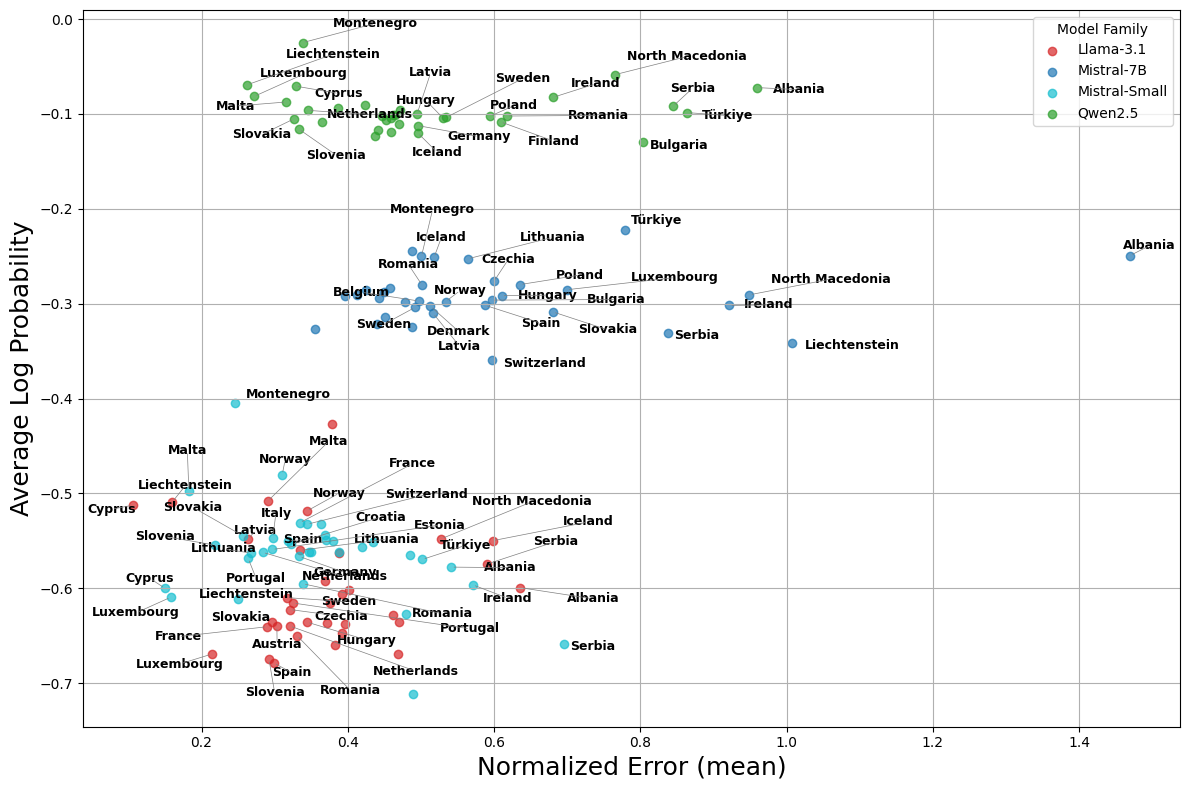

In [14]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Grouper par pays et modèle
grouped = df_filtered.groupby(["country", "model"])[["normalized_error", "logprobs"]].mean().reset_index()

# Familles de modèles et leurs couleurs
model_colors = {
    'Mistral-7B': 'tab:blue',
    'Mistral-Small': 'tab:cyan',
    'Qwen2.5': 'tab:green',
    'Llama-3.1': 'tab:red'
}

# Fonction pour déterminer la famille de modèle
def get_family(model_name):
    if "Mistral-7" in model_name:
        return "Mistral-7B"
    elif "Mistral-Small" in model_name:
        return "Mistral-Small"
    elif "Qwen2.5" in model_name:
        return "Qwen2.5"
    elif "Llama-3.1" in model_name:
        return "Llama-3.1"
    else:
        return "Other"

grouped["family"] = grouped["model"].apply(get_family)

grouped = grouped.groupby(["country", "family"])[["normalized_error", "logprobs"]].mean().reset_index()

# Plot
TOP_K = 45  # Change this number based on how many countries you want to annotate

# Get top and bottom k countries by normalized error (absolute value optional)
top_k_rows = grouped.nlargest(TOP_K, "normalized_error")
bottom_k_rows = grouped.nsmallest(TOP_K, "normalized_error")
label_rows = pd.concat([top_k_rows, bottom_k_rows])

# Plot base
plt.figure(figsize=(12, 8))
texts = []

# Scatter by model family
for family, data in grouped.groupby("family"):
    plt.scatter(data["normalized_error"], data["logprobs"],
                label=family, color=model_colors.get(family, 'gray'), alpha=0.7)

# Label only selected countries
for _, row in label_rows.iterrows():
    texts.append(
        plt.text(row["normalized_error"], row["logprobs"], row["country"],
                 fontsize=9, weight='bold')
    )

# Adjust label positions
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", color='gray', lw=0.5),
    force_points=0.3,
    force_text=0.5,
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4),
    only_move={'points': 'y', 'text': 'xy'},
    lim=200
)

#plt.title("LLM Confidence vs. Normalized Error per Country", fontsize=16)
plt.xlabel("Normalized Error (mean)", fontsize=18)
plt.ylabel("Average Log Probability", fontsize=18)
plt.grid(True)
plt.legend(title="Model Family")
plt.tight_layout()
plt.show()

## Focus on particular model

In [19]:
# Datafiles

# MODEL = "Qwen/Qwen2.5-7B-Instruct"  
# model_short_name = "Qwen2.5-7B-Instruct"

# Llama-3.1-70B-Instruct
MODEL = "meta-llama/Llama-3.1-70B-Instruct"  
model_short_name = "Llama-3.1-70B-Instruct"

# Mistral-Small-24B-Instruct-2501
MODEL = "mistralai/Mistral-Small-24B-Instruct-2501"  
model_short_name = "Mistral-Small-24B-Instruct-2501"

data_dir = "./../output/bash"
eurostat_data_files = [
    {
        "indicator": "income",
        "path_absolute": f"{data_dir}/income_2017_nuts_llm_{model_short_name}_absolute.csv",
        "path_relative": f"{data_dir}/income_2017_nuts_llm_{model_short_name}_relative.csv",
        "complete_year": "2017",
        "unit": "EUR_HAB"
    },
    {
        "indicator": "pop_density",
        "path_absolute": f"{data_dir}/pop_density_2018_nuts_llm_{model_short_name}_absolute.csv",
        "path_relative": f"{data_dir}/pop_density_2018_nuts_llm_{model_short_name}_relative.csv",
        "complete_year": "2018",
        "unit": "PER_KM2",
        "nan": ":", # null value are ":" and not empty cell
    },
    {
        "indicator": "poverty",
        "path_absolute": f"{data_dir}/poverty_2022_nuts_llm_{model_short_name}_absolute.csv",
        "path_relative": f"{data_dir}/poverty_2022_nuts_llm_{model_short_name}_relative.csv",
        "complete_year": "2022",
        "unit": "PC",
        "nan": ":"
    },
    {
        "indicator": "age_index",
        "path_absolute": f"{data_dir}/age_index_2021_nuts_llm_{model_short_name}_absolute.csv",
        "path_relative": f"{data_dir}/age_index_2021_nuts_llm_{model_short_name}_relative.csv",
        "complete_year": "2021",
        "unit": "NR"
    }
]


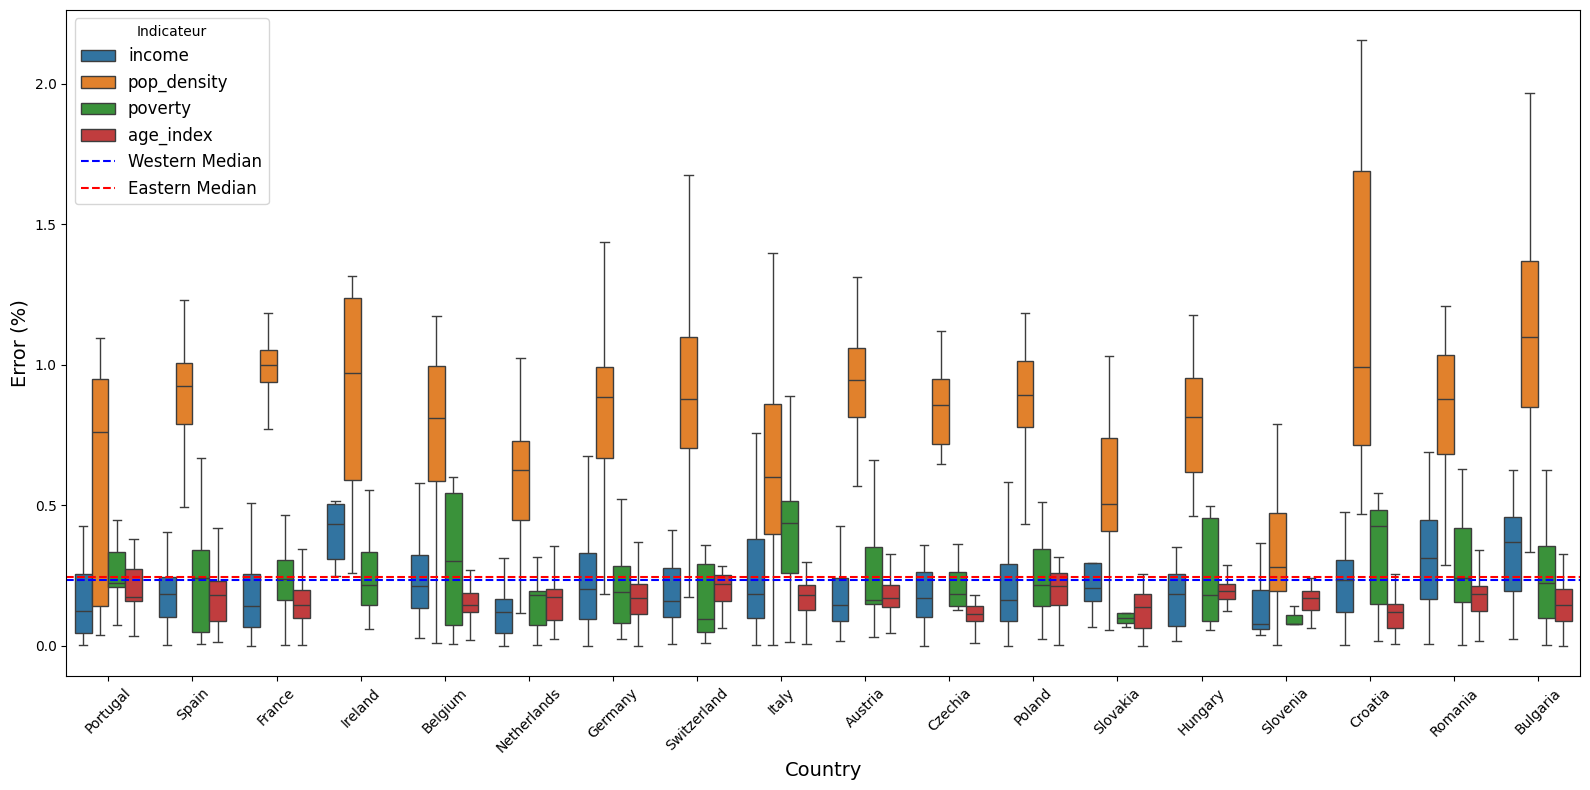

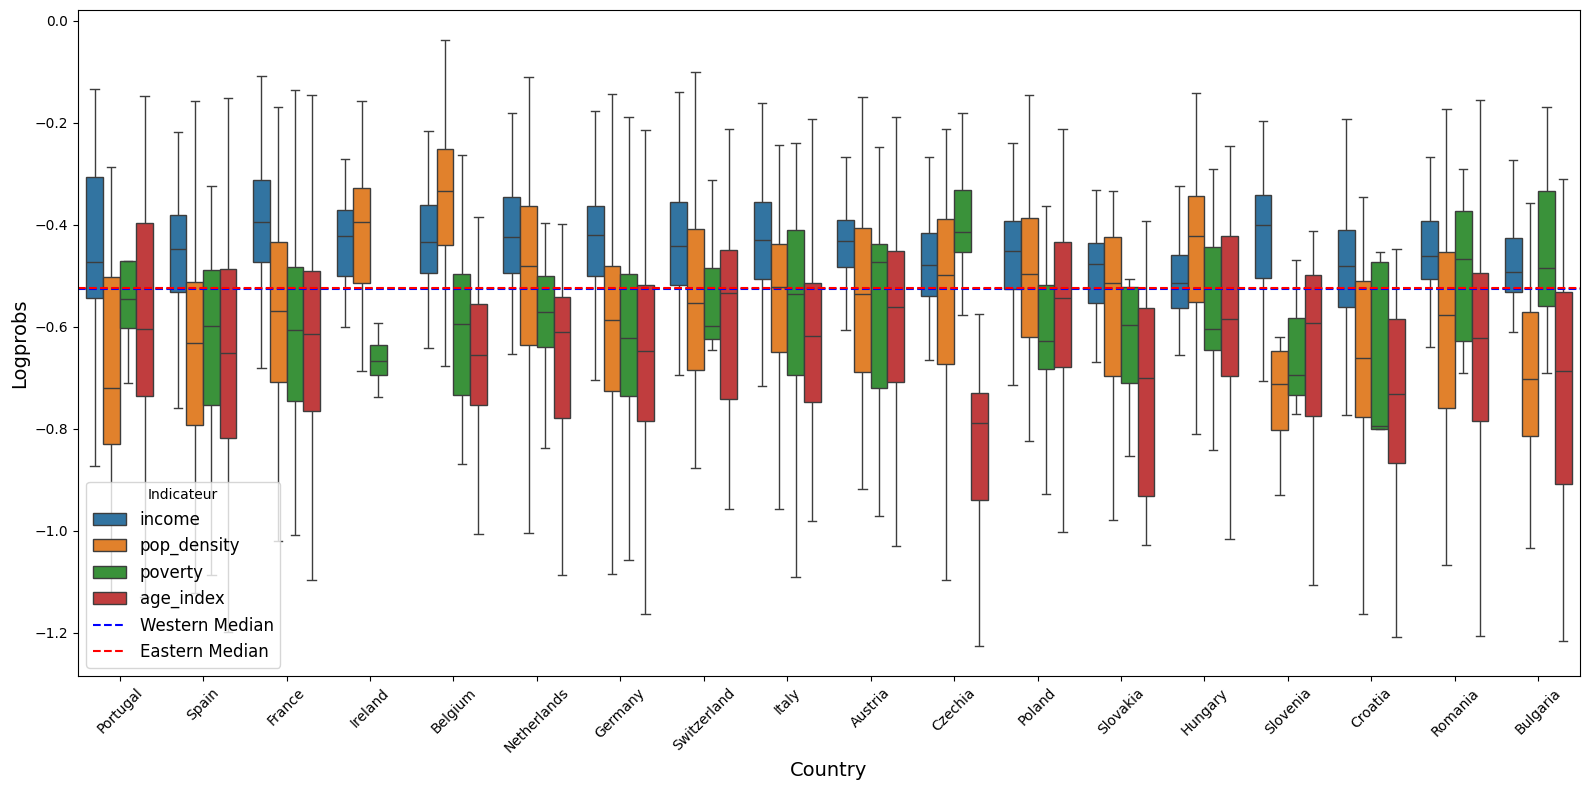

In [20]:
all_errors = []

for file_info in eurostat_data_files:
    indicator = file_info["indicator"]
    data = pd.read_csv(file_info["path_relative"])
    data[f"error"] = abs(data[f"{indicator}_relative_predicted"] - data[f"relative_{indicator}"]) / data[f"average_country_indicator"]
    data["logprobs"] = data[f'{indicator}_relative_logprobs']
    data["indicator"] = indicator
    
    # Append to the list
    all_errors.append(data[["country", f"error", 'logprobs', "indicator"]])

# Combine all data into a single DataFrame
combined_data = pd.concat(all_errors)
combined_data = combined_data.dropna(subset=["error"])
combined_data = combined_data.reset_index()

# Define geographic order of countries
geographic_order = [
    "Portugal", "Spain", "France", "Ireland", "United Kingdom", "Belgium", "Netherlands",
    "Germany", "Switzerland", "Italy", "Austria", "Czechia", "Poland",
    "Slovakia", "Hungary", "Slovenia", "Croatia", "Romania", "Bulgaria", "Greece"
]
western_countries = [
    "Portugal", "Spain", "France", "Ireland", "United Kingdom", "Belgium", 
    "Netherlands", "Germany", "Switzerland", "Italy", "Austria"
]
eastern_countries = [
    "Czechia", "Poland", "Slovakia", "Hungary", "Slovenia", 
    "Croatia", "Romania", "Bulgaria", "Greece"
]

countries_in_data = combined_data["country"].unique()
geographic_order_filtered = [country for country in geographic_order if country in countries_in_data]
western_median = combined_data[combined_data["country"].isin(western_countries)]["error"].median()
eastern_median = combined_data[combined_data["country"].isin(eastern_countries)]["error"].median()

# Create the boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(
    x="country", y="error", hue="indicator", data=combined_data,
    order=geographic_order_filtered,
    showfliers=False
)
plt.axhline(y=western_median, color="blue", linestyle="--", label="Western Median")
plt.axhline(y=eastern_median, color="red", linestyle="--", label="Eastern Median")
# Customize the plot
# plt.title(f"Boxplot of error during relative prediction of 4 indicators with {model_short_name}", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Error (%)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Indicateur", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


western_median = combined_data[combined_data["country"].isin(western_countries)]["logprobs"].median()
eastern_median = combined_data[combined_data["country"].isin(eastern_countries)]["logprobs"].median()
plt.figure(figsize=(16, 8))
sns.boxplot(
    x="country", y="logprobs", hue="indicator", data=combined_data,
    order=geographic_order_filtered, 
    showfliers=False
)

plt.axhline(y=western_median, color="blue", linestyle="--", label="Western Median")
plt.axhline(y=eastern_median, color="red", linestyle="--", label="Eastern Median")
# Customize the plot
# plt.title(f"Boxplot of logprobs during relative prediction of 4 indicators with {model_short_name}", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Logprobs", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Indicateur", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
combined_data

,index,country,error,logprobs,indicator
0,0,Austria,0.011756,-0.199548,income
1,1,Austria,0.217106,-0.102809,income
2,2,Albania,0.829187,0.000000,income
3,3,Albania,2.990050,-0.190137,income
4,4,Albania,0.520177,0.000000,income
...,...,...,...,...,...
5173,1445,Sweden,0.195746,-0.226891,age_index
5174,1446,Slovenia,0.060398,-0.334513,age_index
5175,1447,Portugal,0.534204,0.000000,age_index
5176,1448,Slovakia,0.150588,0.000000,age_index


In [ ]:
for model in df["model"].unique():
    print(model)

Mistral-Small-24B-Instruct-2501
Qwen2.5-32B-Instruct
Qwen2.5-14B-Instruct
Qwen2.5-72B-Instruct
Llama-3.1-8B-Instruct
Llama-3.1-70B-Instruct
Qwen2.5-7B-Instruct
Mistral-7B-Instruct-v0.3
